<a href="https://colab.research.google.com/github/ariG23498/SimCLR_PseudoLabel/blob/master/Supervised_Training_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow Imports
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Which GPU?
!nvidia-smi

Fri Aug 21 06:58:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/GoogleCloudPlatform/keras-idiomatic-programmer/master/zoo/resnet/resnet_cifar10.py

--2020-08-21 06:59:01--  https://raw.githubusercontent.com/GoogleCloudPlatform/keras-idiomatic-programmer/master/zoo/resnet/resnet_cifar10.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6064 (5.9K) [text/plain]
Saving to: ‘resnet_cifar10.py’

resnet_cifar10.py   100%[===================>]   5.92K  --.-KB/s    in 0s      

2020-08-21 06:59:02 (59.6 MB/s) - ‘resnet_cifar10.py’ saved [6064/6064]



In [4]:
# Other imports
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
import tensorflow as tf
import resnet_cifar10
import numpy as np
import time

# Random seed fixation
tf.random.set_seed(666)
np.random.seed(666)

In [5]:
def get_training_model():
    # ResNet20
    n = 2
    depth =  n * 9 + 2
    n_blocks = ((depth - 2) // 9) - 1

    # The input tensor
    inputs = Input(shape=(32, 32, 3))

    # The Stem Convolution Group
    x = resnet_cifar10.stem(inputs)

    # The learner
    x = resnet_cifar10.learner(x, n_blocks)

    # The Classifier for 10 classes
    outputs = resnet_cifar10.classifier(x, 10)

    # Instantiate the Model
    model = Model(inputs, outputs)
    
    return model

In [6]:
def plot_training(H):
	# construct a plot that plots and saves the training history
	with plt.xkcd():
		plt.figure()
		plt.plot(H.history["loss"], label="train_loss")
		plt.plot(H.history["val_loss"], label="val_loss")
		plt.plot(H.history["accuracy"], label="train_acc")
		plt.plot(H.history["val_accuracy"], label="val_acc")
		plt.title("Training Loss and Accuracy")
		plt.xlabel("Epoch #")
		plt.ylabel("Loss/Accuracy")
		plt.legend(loc="lower left")
		plt.show()

In [8]:
# Load the training set of CIFAR10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Scale the pixel values
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

In [9]:
model = get_training_model()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_166 (Conv2D)             (None, 32, 32, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_164 (BatchN (None, 32, 32, 16)   64          conv2d_166[0][0]                 
__________________________________________________________________________________________________
re_lu_164 (ReLU)                (None, 32, 32, 16)   0           batch_normalization_164[0][0]    
_______________________________________________________________________________________

- Total params: 575,114
- Trainable params: 571,114
- Non-trainable params: 4,000


In [10]:
# Early Stopping to prevent overfitting
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, verbose=2, restore_best_weights=True)

Epoch 1/75
782/782 [==============================] - 53s 68ms/step - loss: 1.3272 - accuracy: 0.5184 - val_loss: 1.4039 - val_accuracy: 0.5169
Epoch 2/75
782/782 [==============================] - 52s 67ms/step - loss: 0.9266 - accuracy: 0.6703 - val_loss: 1.0142 - val_accuracy: 0.6455
Epoch 3/75
782/782 [==============================] - 53s 67ms/step - loss: 0.7523 - accuracy: 0.7352 - val_loss: 1.2745 - val_accuracy: 0.5973
Epoch 4/75
782/782 [==============================] - 52s 67ms/step - loss: 0.6268 - accuracy: 0.7795 - val_loss: 0.7772 - val_accuracy: 0.7242
Epoch 5/75
782/782 [==============================] - 52s 67ms/step - loss: 0.5253 - accuracy: 0.8157 - val_loss: 0.7698 - val_accuracy: 0.7362
Epoch 6/75
782/782 [==============================] - 53s 67ms/step - loss: 0.4401 - accuracy: 0.8453 - val_loss: 0.9878 - val_accuracy: 0.6970
Epoch 7/75
782/782 [==============================] - 52s 67ms/step - loss: 0.3669 - accuracy: 0.8699 - val_loss: 0.8766 - val_accuracy:

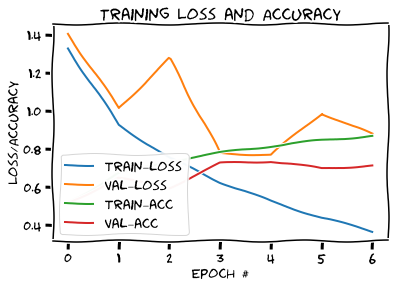

In [12]:
# Train model
model = get_training_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h = model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         batch_size=64,
         epochs=75,
         callbacks=[es])

plot_training(h)